In [2]:
import pandas as pd
import matplotlib.pyplot as plt

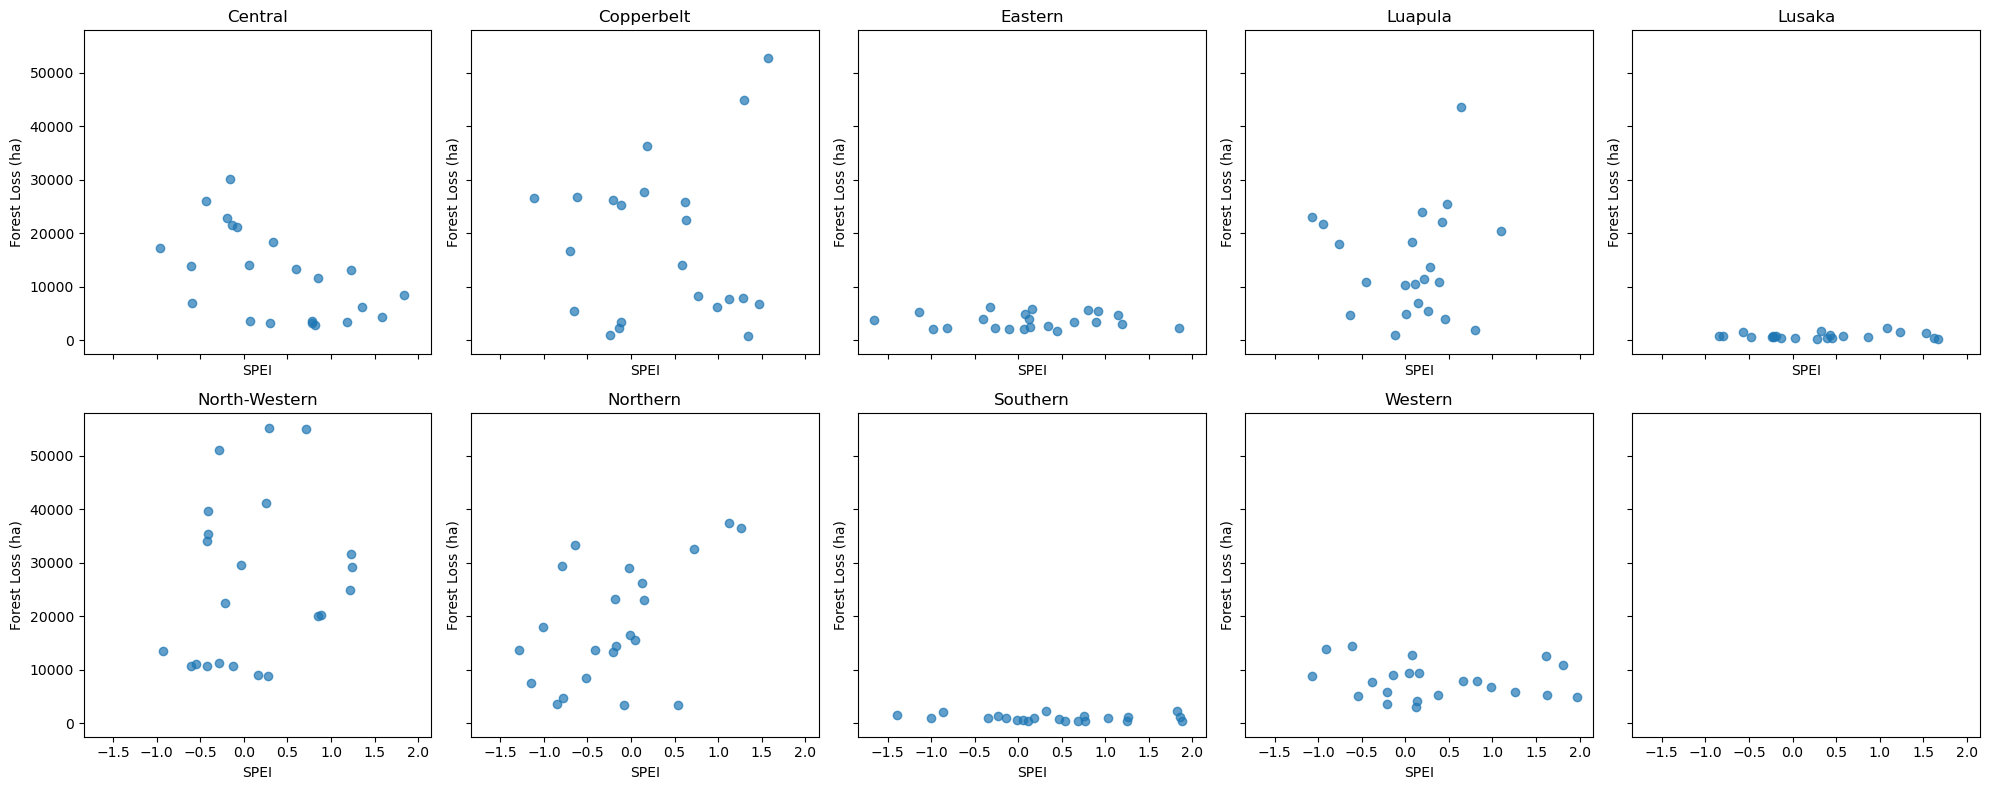

In [9]:
lcluc = pd.read_csv('./province_lcluc.csv')
spei = pd.read_csv('./province_spei_average.csv', parse_dates=['date'])

# convert spei data to long format
spei_long = spei.melt(id_vars='date', var_name='province', value_name='spei')
spei_long['year'] = spei_long['date'].dt.year
spei_long['spei'] = spei_long['spei'].interpolate()

# aggregate SPEI to annual mean
spei_annual = spei_long.groupby(['province', 'year'])['spei'].mean().reset_index()

# merge dataframes
merged_df = pd.merge(spei_annual, lcluc, on=['province', 'year'])

# get unique province names
provinces = merged_df['province'].unique()

# create panel plot
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,8), sharex=True, sharey=True)
axes = axes.flatten()

for i, province in enumerate(provinces[:10]):
    ax = axes[i]
    subset = merged_df[merged_df['province'] == province]
    ax.scatter(subset['spei'], subset['loss_ha'], alpha=0.7)
    ax.set_title(province)
    ax.set_xlabel('SPEI')
    ax.set_ylabel('Forest Loss (ha)')

plt.tight_layout()
plt.show()